## VI.9.32
# Newton's method


Polulation in 2010 = 827.9065090000029 mln


Text(0, 0.5, 'Population')

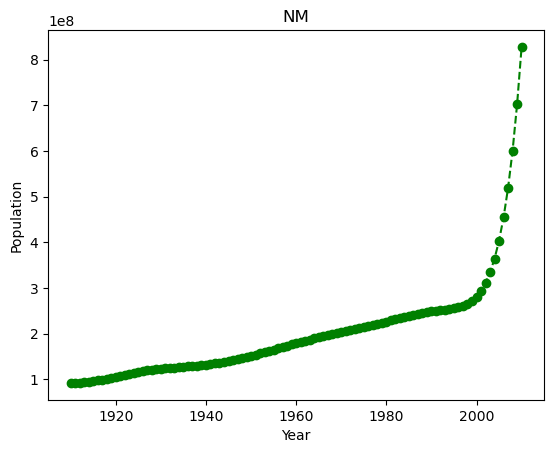

In [17]:
import matplotlib.pyplot as plt

y = [92228496, 106021537, 123202624,
    132164569, 151325798, 179323175,
    203211926, 226545805, 248709873,
    281421906]

a = [92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203211926, 226545805, 248709873]

n = len(y)
x = []
sp = 1910
for i in range(n):
    x.append(sp + i * 10)
    
f = [[0.0] * n for i in range(n)]
for i in range(n):
    f[i][0] = y[i]

for j in range(1, n):
    for i in range(j, n):
        f[i][j] = (f[i][j - 1] - f[i - 1][j - 1]) / (x[i] - x[i - j])
        
x0 = 2010
sum = 0
l = 1
for i in range(0, n):
    sum += f[i][i] * l
    l *= x0 - x[i]
    
print(f'Polulation in {x0} = {sum / 1e6} mln')

gr_y = []
gr_x = list(i for i in range(1910, 2011))
xs = len(gr_x)
for j in range(xs):
    sum = 0
    l = 1
    for i in range(0, n):
        sum += f[i][i] * l
        l *= gr_x[j] - x[i]
    gr_y.append(sum)

plt.title("NM")
plt.plot(gr_x, gr_y, 'go', linestyle = '--')
plt.xlabel("Year")
plt.ylabel("Population")


# Splines

In [66]:
def tridiagonal_matrix_algorithm(A, f):
    N = len(f)
    a = [0.0 for i in range(N)]
    b = [0.0 for i in range(N)]
    c = [0.0 for i in range(N)]
    
    for i in range(N):
        b[i] = A[i][i]    
        if (i > 0):
            a[i] = A[i][i - 1]
        if (i < N - 1):
            c[i] = A[i][i + 1]
    
    p = [0.0 for i in range(N)]
    r = [0.0 for i in range(N)]
    
    p[0] = c[0] / b[0]
    r[0] = f[0] / b[0]
    for i in range(1, N):
        p[i] = c[i] / (b[i] - a[i] * p[i - 1])
        r[i] = (f[i] - a[i] * r[i - 1]) / (b[i] - a[i] * p[i - 1])
    
    x = [0.0 for i in range(N)]
    x[N - 1] = r[N - 1]
    for i in range(N - 2, -1, -1):
        x[i] = r[i] - p[i] * x[i + 1]

    return x

Polulation in 2010 = 329.2758817789123 mln


Text(0, 0.5, 'Population')

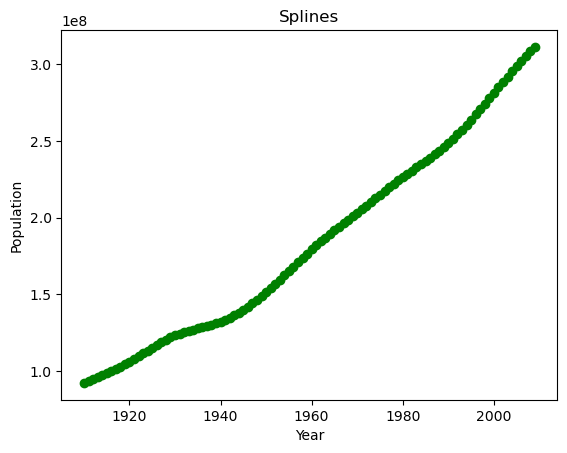

In [70]:
N = n - 1
a = [0.0 for i in range(N)]
b = [0.0 for i in range(N)]
d = [0.0 for i in range(N)]
h = [0.0 for i in range(N)]

# find h[i]
for i in range(N):
    h[i] = x[i + 1] - x[i]

# find c[i]
A = [[0.0] * (N - 1) for i in range(N - 1)]
for i in range(1, N - 2): 
    A[i][i] = 2
    A[i][i - 1] = h[i] / (h[i] + h[i + 1])
    A[i][i + 1] = h[i + 1] / (h[i] + h[i + 1])
A[0][0] = 2
A[0][1] = h[1] / (h[0] + h[1])
A[N - 2][N - 2] = 2
A[N - 2][N - 3] = h[N - 2] / (h[N - 2] + h[N - 1])

p = 2
u = [0.0] * (N - 1)
for i in range(N - 1):
    u[i] = 6 * f[i + p][2]
    
c = tridiagonal_matrix_algorithm(A, u)
c.append(0)

#find a[i], d[i]
for i in range(1, N):
    a[i] = y[i + 1]
    d[i] = (c[i] - c[i - 1]) / h[i]
a[0] = y[1]
d[0] = c[0] / h[0]

#find b[i]
p = 1
for i in range(1, N):
    b[i] = c[i] * h[i] / 3 + c[i - 1] * h[i] / 6 + f[i + p][1]
b[0] = c[0] * h[0] / 3 + f[p][1]

sum1 = a[N - 1]
sum2 = b[N - 1] * (x0 - x[N - 1])
sum3 = c[N - 1]  * (x0 - x[N - 1]) * (x0 - x[N - 1]) / 2
sum4 = d[N - 1] * (x0 - x[N - 1]) * (x0 - x[N - 1]) * (x0 - x[N - 1]) / 6
sum = sum1 + sum2 + sum3 + sum4
print(f'Polulation in {x0} = {sum / 1e6} mln')

gr_y = []
gr_x = list(i for i in range(1910, 2010))
xb = 1910
xs = len(gr_x)
for j in range(xs):
    N = (gr_x[j] - xb) // 10
    
    if (N >= n - 1):
        N = n - 2

    sum1 = a[N]
    sum2 = b[N] * (gr_x[j] - x[N + 1])
    sum3 = c[N] * (gr_x[j] - x[N + 1]) * (gr_x[j] - x[N + 1]) / 2
    sum4 = d[N] * (gr_x[j] - x[N + 1]) * (gr_x[j] - x[N + 1]) * (gr_x[j] - x[N + 1]) / 6
    sum = sum1 + sum2 + sum3 + sum4
    gr_y.append(sum)

plt.title("Splines")
plt.plot(gr_x, gr_y, 'go', linestyle = '--')
plt.xlabel("Year")
plt.ylabel("Population")

# Least squares


In [12]:
import copy
def gauss_method(A, b):
    n = len(A) # Matrix size
    b1 = copy.deepcopy(b)
    A1 = copy.deepcopy(A)
    for k in range(n):
        # Choose the main element
        max_elem = A1[k][k] # max element in column
        row_max_elem = k
        for m in range(k + 1, n):
            if (abs(A1[m][k]) > abs(max_elem)):
                max_elem = A1[m][k]
                row_max_elem = m
            A1[k], A1[row_max_elem] = A1[row_max_elem], A1[k]
            b1[k], b1[row_max_elem] = b1[row_max_elem], b1[k]
    
        if (A1[k][k] == 0):
            print("Can`t solve the system of equations")
        else: 
            for m in range(k + 1, n):
                coeff = -A1[m][k] / A1[k][k]
                for l in range(k, n):
                    A1[m][l] += A1[k][l] * coeff
                b1[m] += b1[k] * coeff
    
    x = [0] * n
    for i in range(n - 1, -1, -1):
        sum = 0
        for j in range(i, n):
            sum += A1[i][j] * x[j]
        x[i] = (b1[i] - sum) / A1[i][i]   
    return x

Polulation in 2010 = 289.7293840667314 mln


Text(0, 0.5, 'Population')

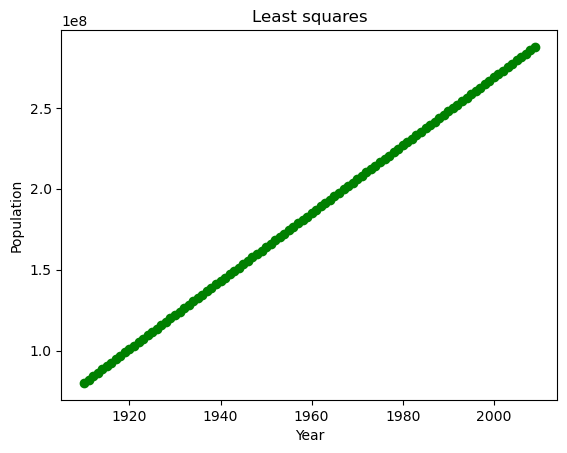

In [39]:
N = 2
n = 10
A = [[0.0] * N for i in range(N)]
sum = 0
sq_sum = 0
y_sum = 0
yx_sum = 0
for i in range(n):
    sum += x[i]
    sq_sum += x[i] * x[i]
    y_sum += y[i]
    yx_sum += y[i] * x[i]

A[0][0] = n
A[1][0] = sum
A[0][1] = sum
A[1][1] = sq_sum
b = [0.0 for i in range(N)]
b[0] = y_sum
b[1] = yx_sum

cf = gauss_method(A, b)
print(f'Polulation in {x0} = {(cf[0] + x0 * cf[1]) / 1e6} mln')

gr_y = []
gr_x = list(i for i in range(1910, 2010))
xb = 1910
xs = len(gr_x)
for j in range(xs):
    v = cf[0] + gr_x[j] * cf[1]
    gr_y.append(v)

plt.title("Least squares")
plt.plot(gr_x, gr_y, 'go', linestyle = '--')
plt.xlabel("Year")
plt.ylabel("Population")

 По результатам переписи население США составило 308 745 538 человек в 2010 году. Наиболее точными оказались метод наименьших кавадратов и сплайны. 